# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Mark Billiarder Manasye
- **Email:** markbilliarder29@gmail.com
- **ID Dicoding:** markbilli123

## Menentukan Pertanyaan Bisnis

- Identifikasi Waktu optimal sewa sepeda guna meningkatkan pendapatan
- Identifikasikan waktu terbaik untuk menargetkan pelanggan potensial
- Identifikasi 1 atau 2 Pola Khusus dalam suatu event di data rental sepeda dan tentukan rencana untuk dapat meningkatkan pendapatan di pola atau event kedepan(Berkorelasi dengan suatu kejadian yang dapat dicari di internet).

## Import Semua Packages/Library yang Digunakan

In [1]:
#Mengimport library kedalam google colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#memanggil fungsi untuk menerima data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#memanggil setiap dataset

day_df=pd.read_csv("/content/drive/MyDrive/Bike_Sharing_Dataset/day.csv")
hour_df=pd.read_csv("/content/drive/MyDrive/Bike_Sharing_Dataset/hour.csv")

### Assessing Data

Diassesing data ini, saya akan mengecek overview data dan ingin mengetahui isi dataset yang saya miliki.Serta ingin memastikan apakah ada duplikasi dan null data yang ada didalam dataset.

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
#ngecek duplikasi di data day_df
day_df.duplicated().sum()

0

In [11]:
#ngecek duplikasi di data hour_df
hour_df.duplicated().sum()

0

### Cleaning Data

Di cleaning data,saya ingin memastikan setiap data type dan null dataset sudah dipastikan bersih sebelum memulai proses analisa.

In [12]:
#Mengubah data type dteday dari data day menjadi date time.
day_df['dteday'] =pd.to_datetime(day_df['dteday'])


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
day_df['dteday'] =pd.to_datetime(day_df['dteday'])


In [15]:
hour_df['dteday'] =pd.to_datetime(hour_df['dteday'])


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Di sesi explorasi data analisis, Saya ingin melakukan eksplorasi terhadap data untuk dapat menjawab pertanyaan bisnis seperti:
 - Mengetahui pola pelanggan dalam merental sepeda
 - Mengetahui Waktu atau event yang mempengaruhi rental sepeda
 - Mengetahui Isi data yang dimiliki dan Melakukan group agar   dapat mengetahui perbedaan di waktu tertentu terhadap rental sepeda.



In [17]:
hour_df.describe(include="all")

<ipython-input-17-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [18]:
hour_df.groupby(by="season").agg({
    "weekday": "nunique",
    "cnt": "sum"
})

,weekday,cnt
season,,
1,7,471348
2,7,918589
3,7,1061129
4,7,841613


In [19]:
hour_df["casual"].nunique()

322

In [20]:
hour_df.groupby(by="hr").casual.sum().sort_values()

hr
4       874
5      1012
3      1893
6      3017
2      3412
1      4709
0      7375
7      8037
23    11065
8     15761
22    16200
21    20570
9     22458
20    26378
10    33789
19    35505
11    43286
18    44496
12    49718
13    52713
16    53834
17    54220
15    54606
14    55089
Name: casual, dtype: int64

In [21]:
hour_df.groupby(by="hr").registered.sum().sort_values()

hr
4       3554
3       6281
2      12940
5      13249
1      19455
0      31755
6      52115
23     52876
22     79412
10     92468
21    104875
11    108034
14    120563
15    128543
13    132206
12    134696
9     136980
20    138172
7     146134
16    173914
19    191284
8     245240
18    265276
17    282640
Name: registered, dtype: int64

In [22]:
hour_df.groupby(by="hr").cnt.sum().sort_values()

hr
4       4428
3       8174
5      14261
2      16352
1      24164
0      39130
6      55132
23     63941
22     95612
21    125445
10    126257
11    151320
7     154171
9     159438
20    164550
14    175652
15    183149
12    184414
13    184919
19    226789
16    227748
8     261001
18    309772
17    336860
Name: cnt, dtype: int64

In [23]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [24]:
day_df.groupby(by="weekday").casual.sum().sort_values()

weekday
3     57319
2     57843
4     61460
1     70784
5     78238
0    140521
6    153852
Name: casual, dtype: int64

In [25]:
day_df.groupby(by="weekday").registered.sum().sort_values()

weekday
0    303506
6    323955
1    384719
5    409552
2    411266
3    415729
4    423935
Name: registered, dtype: int64

In [26]:
day_df.groupby(by="dteday").registered.sum().sort_values()

dteday
2012-10-29      20
2011-01-27     416
2012-12-26     432
2011-12-25     451
2011-01-26     472
              ... 
2012-10-03    6844
2012-10-24    6898
2012-10-10    6911
2012-09-21    6917
2012-09-26    6946
Name: registered, Length: 731, dtype: int64

In [27]:
day_df.groupby(by="weekday").registered.sum().sort_values()

weekday
0    303506
6    323955
1    384719
5    409552
2    411266
3    415729
4    423935
Name: registered, dtype: int64

In [28]:

day_df.groupby(['season']).agg({'casual': 'sum', 'registered': 'sum'})


,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


In [29]:

day_df.groupby(['season','yr']).agg({'casual': 'sum', 'registered': 'sum'})


casual  registered
season yr                    
1      0    21425      128575
       1    39197      282151
2      0    77564      269752
       1   125958      445315
3      0    95450      324200
       1   130641      510838
4      0    52813      273324
       1    76969      438507

## Visualization & Explanatory Analysis

### Pertanyaan 1:

3- Regression:
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.


Text(0.5, 1.0, 'Top 5 Hourly Bike Rentals')

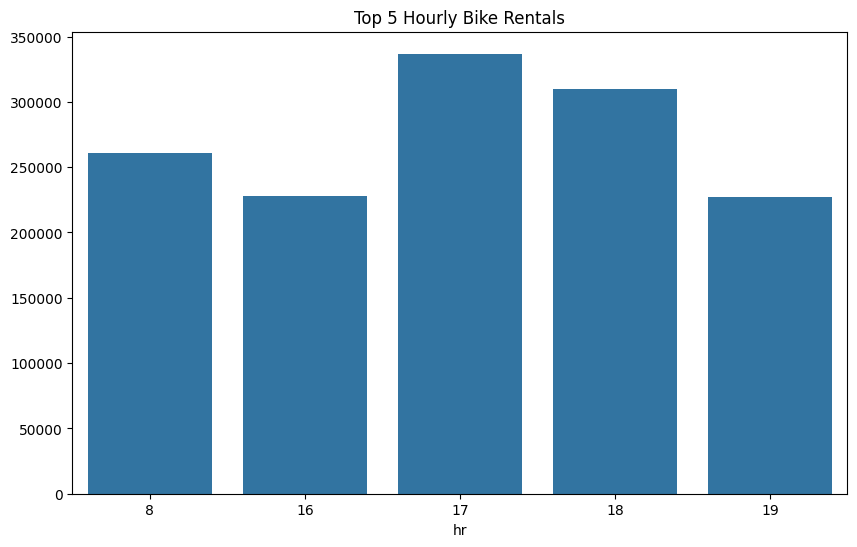

In [30]:
#Menggunakan day_df DataFrame: create visualization top 5 hourly rent from cnt use seaborn
# Melakukan grup data jam dengan total seluruh tipe member
grouped_data = hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=False)[:5]

# Membuat Barchart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Add a title and labels.
plt.title('Top 5 Hourly Bike Rentals')


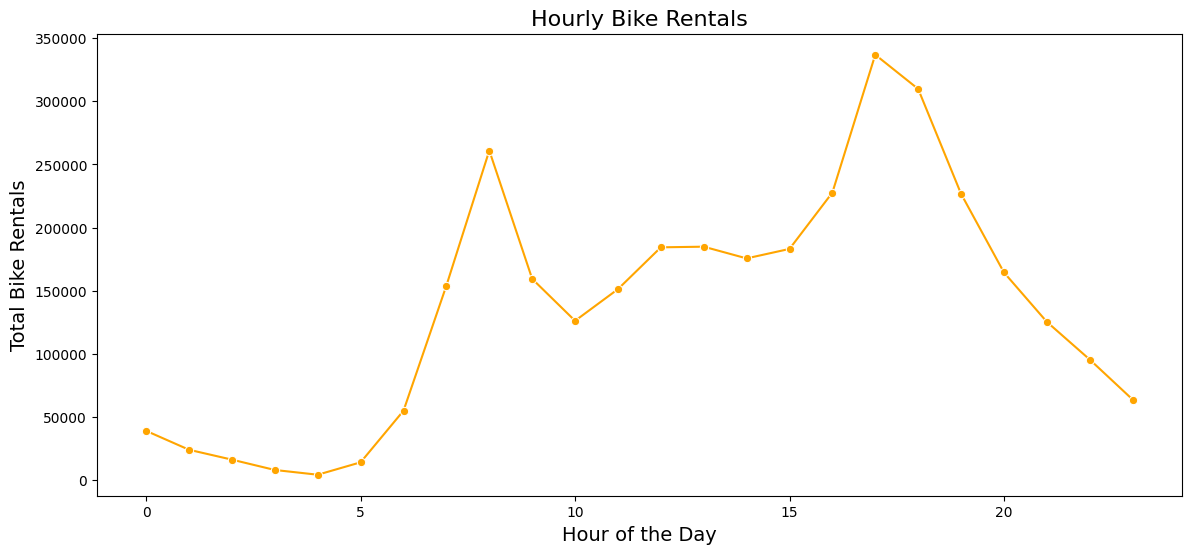

In [31]:

# Melakukan grup data jam dengan total seluruh tipe member.
grouped_data = hour_df.groupby('hr')['cnt'].sum()

# Create a line chart using Seaborn.
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
sns.lineplot(x=grouped_data.index, y=grouped_data.values, marker='o', color='orange', sort=False)

# Add a title and labels.
plt.title('Hourly Bike Rentals', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Bike Rentals', fontsize=14)

# Show the plot.
plt.show()


Text(0.5, 1.0, 'Top 5 Hourly Bike Rentals for Registered Users')

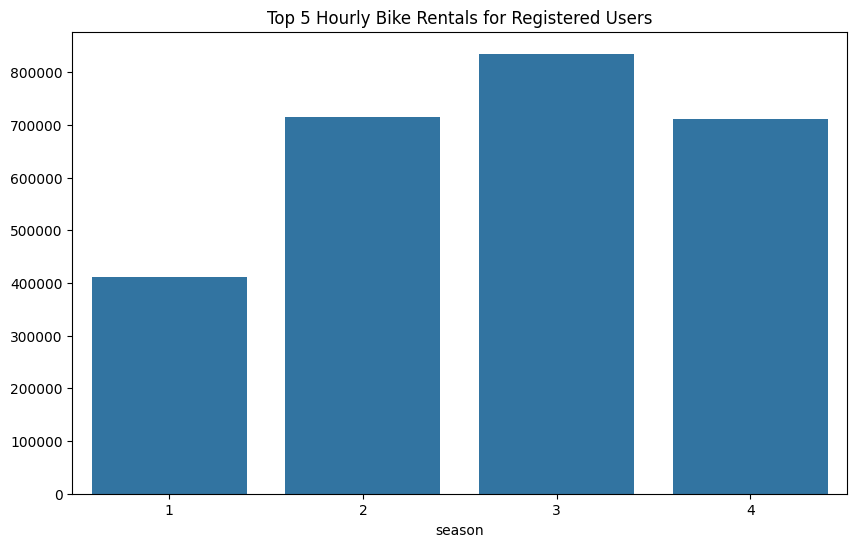

In [32]:

# Mengroup data musiman dengan tipe member.
grouped_data = hour_df.groupby('season')['registered'].sum().sort_values(ascending=False)[:5]

# Melakukan plot bar.
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Menambah Title
plt.title('Top 5 Hourly Bike Rentals for Registered Users')


Text(0.5, 1.0, 'Workingday for member')

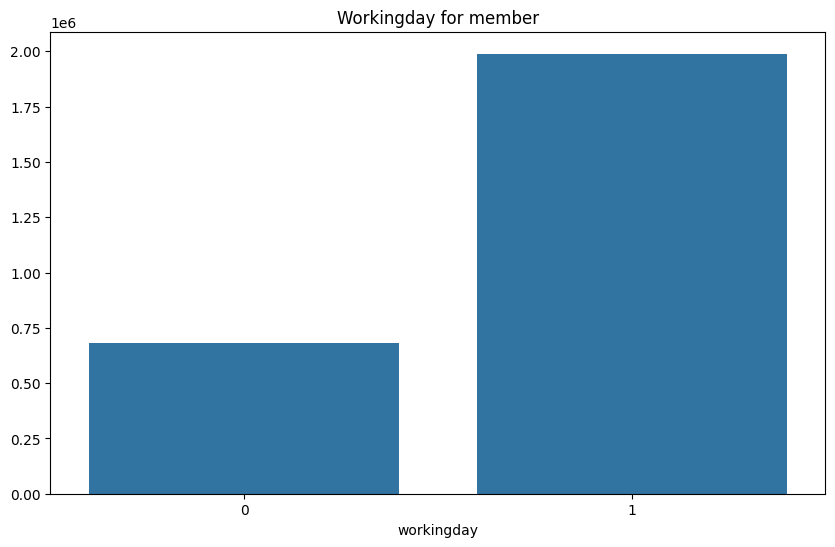

In [33]:
# Melakukan eksplorasi visual untuk mengetahui tipe rental di jam kerja pada tipe member.
grouped_data = hour_df.groupby('workingday')['registered'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Workingday for member')

Text(0.5, 1.0, 'Workingday for non-member')

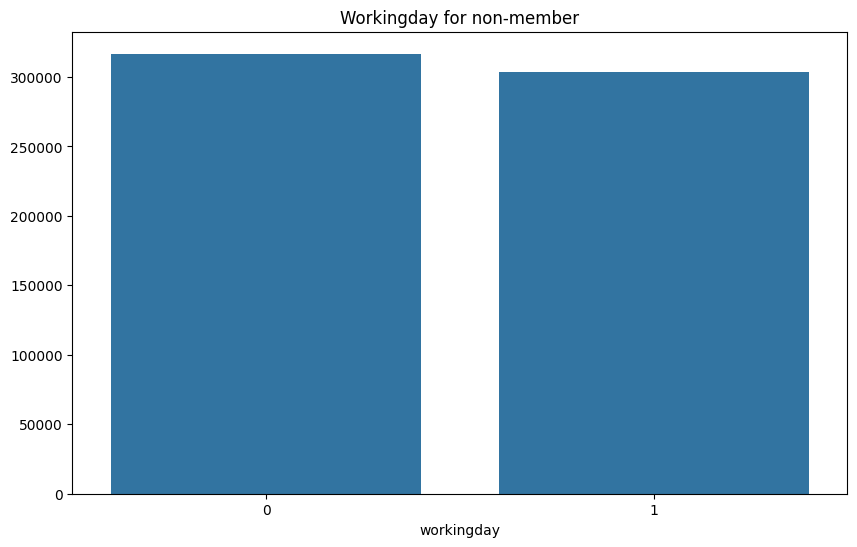

In [34]:
# Melakukan eksplorasi visual untuk mengetahui tipe rental di jam kerja pada tipe non-member.
grouped_data = hour_df.groupby('workingday')['casual'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Workingday for non-member')

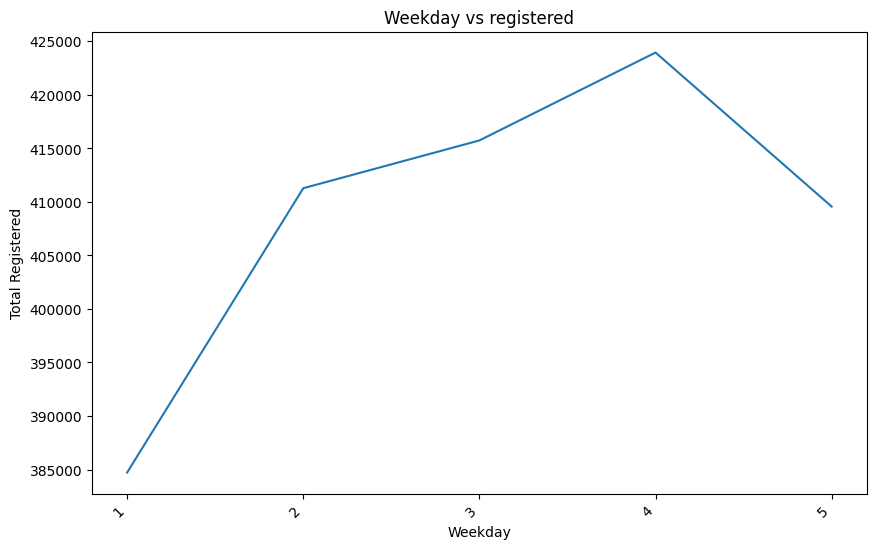

In [35]:

# Mentranformasi data date menjadi tipe data date
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengelompokkan data melalui weekday untuk kategori member
grouped_data = hour_df.groupby('weekday')['registered'].sum().sort_values(ascending=False)[:5]

# Mengubah indeks
grouped_data.index = grouped_data.index.astype(str)

# Mengurutkan indeks dari kecil ke besar
grouped_data = grouped_data.sort_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_data.index, y=grouped_data.values)

#Mengatur kemiringan label pada sumbu x
plt.xticks(rotation=45, ha='right')  # Parameter ha adalah untuk penyejajaran horizontal

plt.title('Weekday vs registered')
plt.xlabel('Weekday')
plt.ylabel('Total Registered')
plt.show()


Text(0.5, 1.0, 'Rent in type member at weekday')

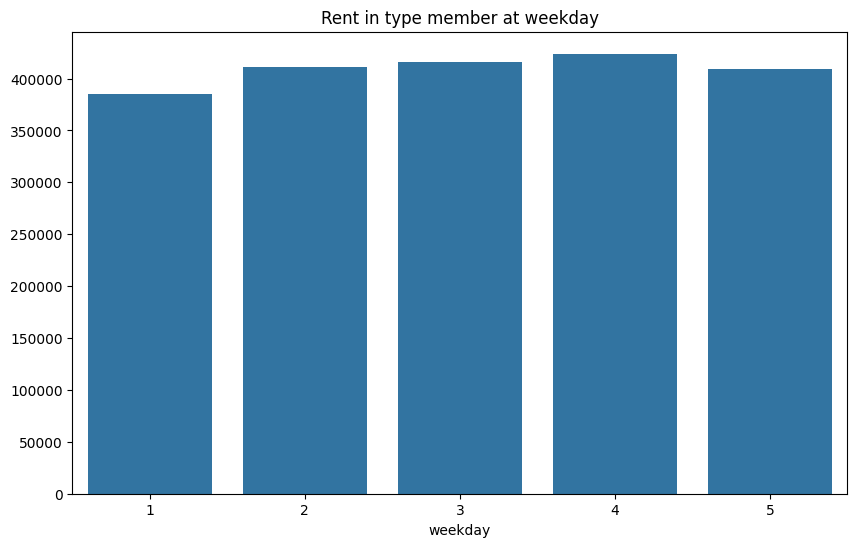

In [36]:
# Ngecek data tipe member untuk mengetahui pada hari apa yang orderannya tinggi
grouped_data = hour_df.groupby('weekday')['registered'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Rent in type member at weekday')

Text(0.5, 1.0, 'rent in non-member at weekday ')

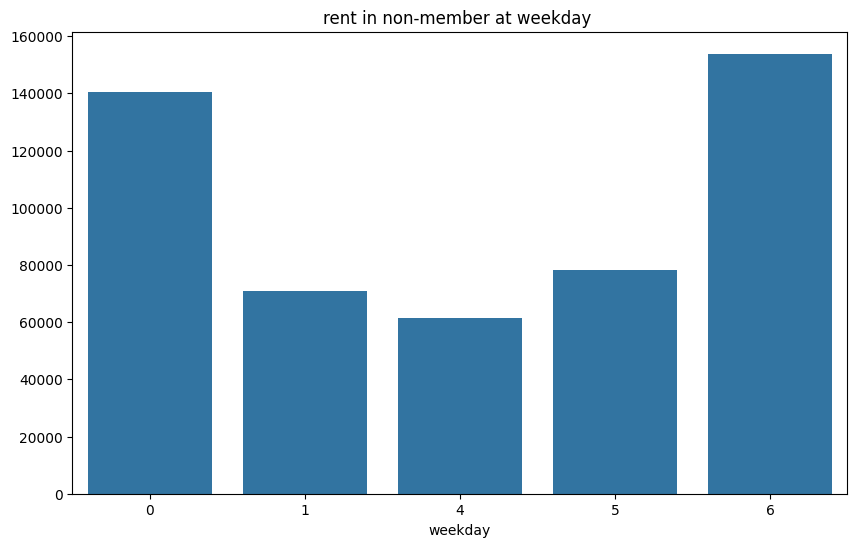

In [37]:
# Ngecek data tipe non-member untuk mengetahui pada hari apa yang orderannya tinggi
grouped_data = hour_df.groupby('weekday')['casual'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('rent in non-member at weekday ')

Text(0.5, 1.0, 'Weathersit for all category member')

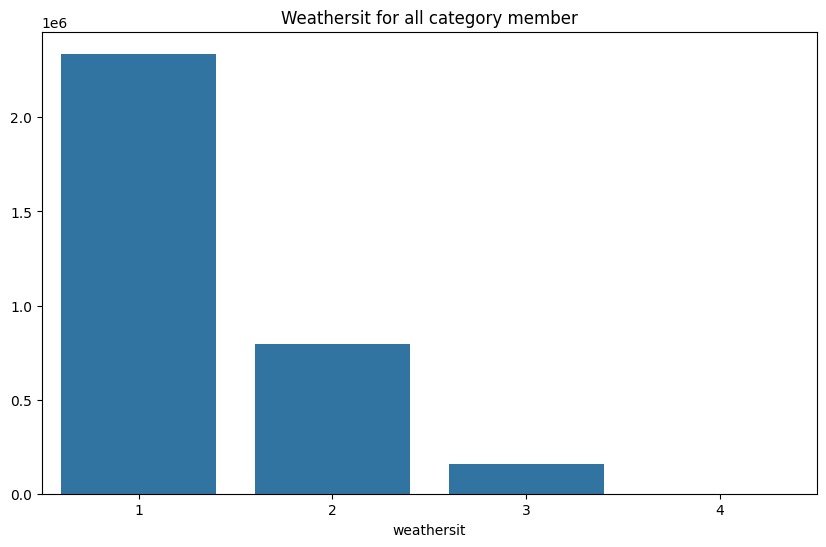

In [38]:
# Ngecek data dengan mengrup cuaca dengan kedua tipe member.
grouped_data = hour_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Weathersit for all category member')

### Pertanyaan 2:


- Identifikasikan waktu terbaik untuk menargetkan pelanggan potensial

Text(0.5, 1.0, 'rent in non-member at weekday ')

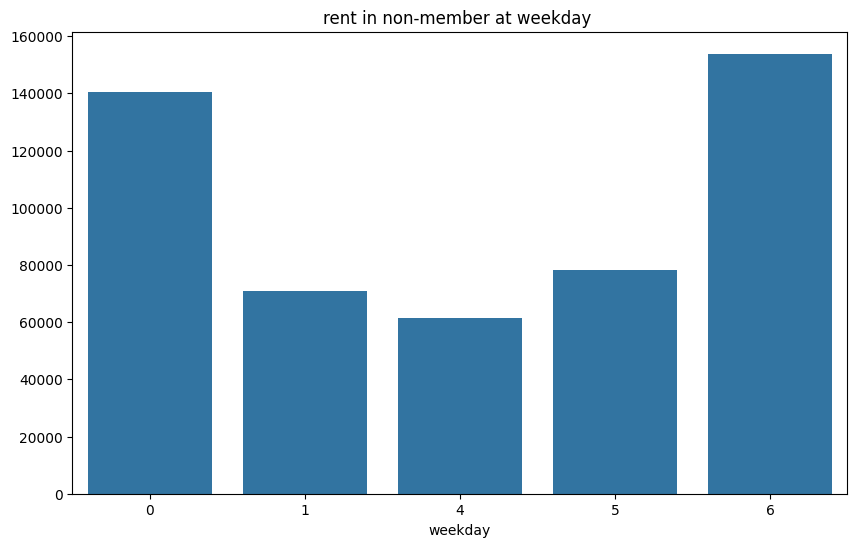

In [39]:
# Ngecek data tipe non-member untuk mengetahui pada hari apa yang orderannya tinggi
grouped_data = hour_df.groupby('weekday')['casual'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('rent in non-member at weekday ')

Text(0.5, 1.0, 'Top 5 Hourly Bike Rentals')

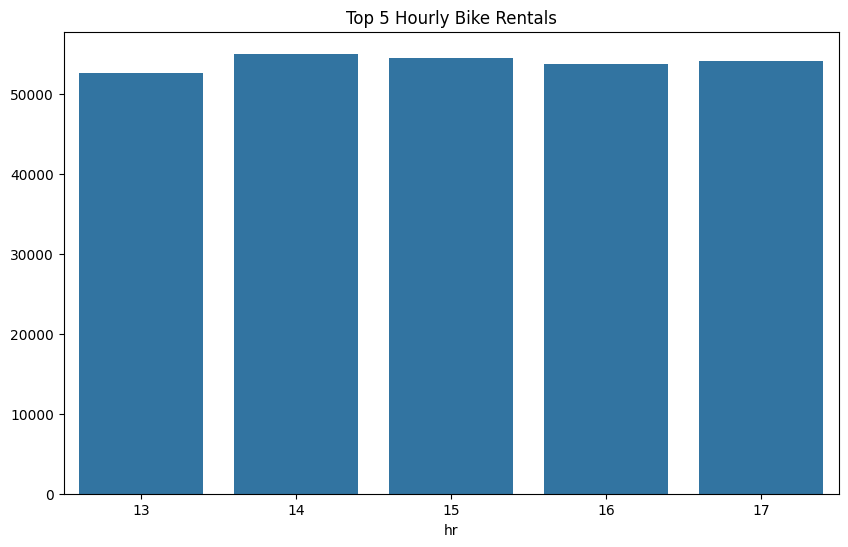

In [61]:
# Melakukan EDA untuk mengetahui waktu terbaik non-member menggunakan produk kita

# Melakukan grup data jam dengan non-member
grouped_data = hour_df.groupby('hr')['casual'].sum().sort_values(ascending=False)[:5]

# Membuat Barchart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Add a title and labels.
plt.title('Top 5 Hourly Bike Rentals')


Text(0.5, 1.0, 'Top 5 Hourly Bike Rentals')

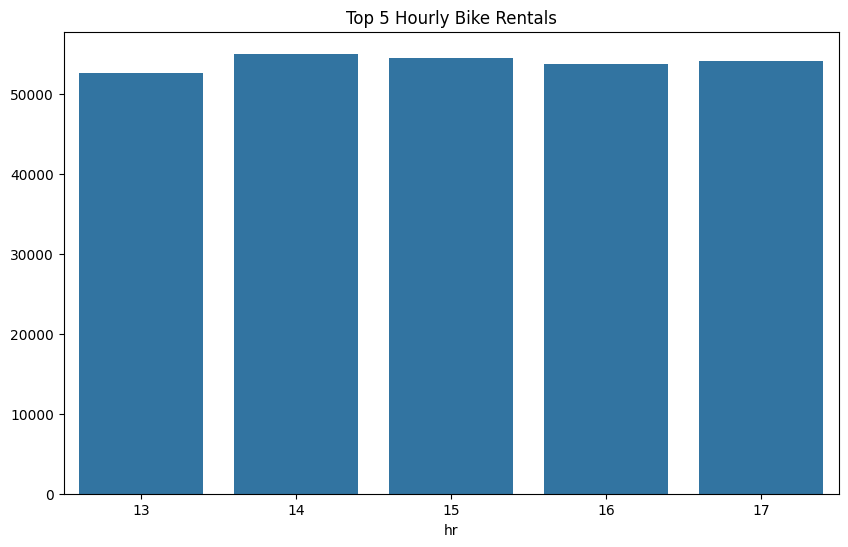

In [50]:
# Melakukan EDA untuk mengetahui waktu terbaik non-member menggunakan produk kita

# Melakukan grup data jam dengan non-member
grouped_data = hour_df.groupby('hr')['casual'].sum().sort_values(ascending=False)[:5]

# Membuat Barchart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Add a title and labels.
plt.title('Top 5 Hourly Bike Rentals')


### Pertanyaan 3:

Identifikasi 1 atau 2 Pola Khusus dalam suatu event di data rental sepeda dan tentukan rencana untuk dapat meningkatkan pendapatan di pola atau event kedepan.

In [40]:
hour_df.resample(rule='M',on='dteday').agg({
    "registered":"sum"
})

,registered
dteday,
2011-01-31,35116
2011-02-28,41973
2011-03-31,51219
2011-04-30,72524
2011-05-31,104771
2011-06-30,112900
2011-07-31,104889
2011-08-31,107849
2011-09-30,100873


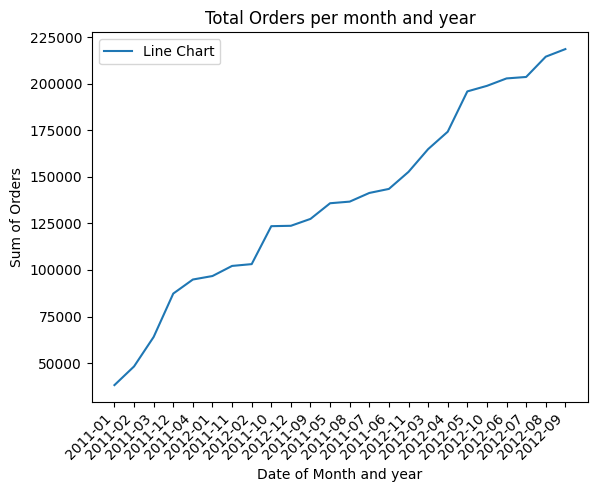

In [41]:
hour_df['month'] = pd.to_datetime(hour_df['dteday']).dt.to_period('M')

grouped_data = hour_df.groupby('month')['cnt'].sum().sort_values()
plt.plot(grouped_data.index.astype(str), grouped_data.values, label='Line Chart')

# Menambahkan lable dan title
plt.xlabel('Date of Month and year')
plt.ylabel('Sum of Orders')
plt.title('Total Orders per month and year')
# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')

# Menambahkan legend
plt.legend()

plt.show()

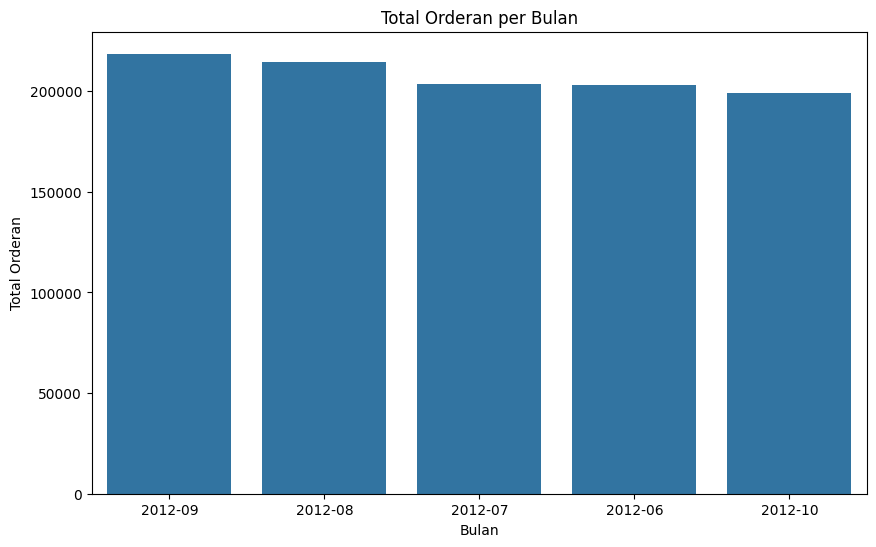

In [42]:
hour_df['month'] = pd.to_datetime(hour_df['dteday']).dt.to_period('M')

# Mengelompokkan berdasarkan bulan dan menghitung total orderan per bulan
grouped_data = hour_df.groupby('month')['cnt'].sum().sort_values(ascending=False)[:5]

# Membuat plot bar untuk menampilkan data
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index.astype(str), y=grouped_data.values)

plt.title('Total Orderan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Orderan')

plt.show()

## Conclusion

Kesimpulan pertanyaa 1 :.


1.   Waktu yang optimal terjadi pada jam 5 dan 6 sore pada musim gugur.Terjadi sewa sepeda dengan lojakan sewa yang signifikan.
2.   Type Member lebih banyak melakukan rental sepeda di musim gugur dan di saat weekend atau hari libur
3.   Type non-member sedikit lebih banyak melakukan rental sepeda di hari biasa dan saat hari biasa/non-libur.

Recomendation:
- Tingginya sewa non-member pada musim gugur menjadi peluang untuk menkonversi menjadi pelanggap tetap melalui promo yang dapat menarik pelanggan sehingga dapat meningkatkan pendapatan.

- Melakukan promosi dan kampanye untuk jam 7 sampai 9 pagi, dikarenakan potensi peningkatan juga terjadi diantara jam tersebut.




Kesimpulan pertanyaan nomor 2


- Hari Weekend yaitu Hari Sabtu dan Minggu merupakan hari terbaik untuk menargetkan konversi non-member karena mereka melakukan rental sepeda dengan jumlah tertinggi diantara tahunannya

- Waktu rental non-member relatif tinggi terjadi diantara jam 1 - jam 4 dimana ini merupakan rental stabil setiap tahunannya.

Rekomendasi:

- Melakukan promosi terhadap non-member di waktu Sabtu atau Minggu dengan memberikan potongan dan benefit.
- Melakukan kampanye promosi menarik member ke non-member disetiap jam 1 - jam 4 di hari weekend karena disitu lonjakan non-member sering terjadi dan merupakan potensi mengubah mereka menjadi member.



 Conclution pertanyaan 3 :

Dari hasil data yang didapatkan:
1. Pada tahun 2012 diantara bulan Juni sampai Oktober terjadi Berbagai event seperti International Day of Democray dan Mayhem Festival yang mempengaruhi lonjakan orderan pada bulan-bulan tersebut.

2. Melakukan persiapan promosi untuk menghadapi event event pada bulan Juni sampai Oktober karena pada bulan tersebut peningkatan orderan terjadi dimasa lampau dan berpotensi meningkatkan orderan untuk dilakukan pada bulan depannya.

